# Защита персональных данных клиентов

## Постановка задачи

Необходимо разработать метод преобразования данных, чтобы по ним было сложно восстановить первичную (персональную) информацию. Также требуется обосновать корректность работы предложенного метода.

Необходимо провести проверку корректности работы модели на первоначальных и модифицированных признаках.

## Загрузка данных

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

RND_ST = 42

### Чтение и просмотр данных

In [2]:
data_raw = pd.read_csv('datasets/insurance.csv')
display(data_raw.sample(7, random_state=RND_ST))

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
1501,1,28.0,56100.0,0,0
2586,1,32.0,41900.0,2,0
2653,1,30.0,26300.0,0,0
1055,1,30.0,37300.0,2,0
705,0,44.0,30000.0,1,1
106,1,45.0,41600.0,2,1
589,1,28.0,32800.0,2,0


In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
for col in data_raw.columns:
    print(col, '\n', np.sort(data_raw[col].unique()))

Пол 
 [0 1]
Возраст 
 [18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 65.]
Зарплата 
 [ 5300.  6000.  7400.  8900.  9800. 10000. 10600. 10800. 11000. 11200.
 11300. 12200. 12900. 13000. 13200. 13300. 13400. 13500. 13800. 13900.
 14100. 14300. 14400. 14500. 14600. 14700. 15000. 15100. 15200. 15600.
 15700. 15900. 16000. 16200. 16300. 16400. 16500. 16600. 16700. 17000.
 17100. 17300. 17400. 17500. 17600. 17700. 17800. 17900. 18100. 18200.
 18300. 18400. 18600. 18700. 18800. 18900. 19000. 19100. 19200. 19300.
 19400. 19600. 19700. 19900. 20000. 20100. 20200. 20300. 20400. 20500.
 20600. 20700. 20800. 20900. 21000. 21100. 21200. 21300. 21400. 21500.
 21600. 21700. 21800. 21900. 22000. 22100. 22200. 22300. 22500. 22600.
 22700. 22800. 22900. 23000. 23100. 23200. 23300. 23400. 23500. 23600.
 23700. 23800. 23900. 24000. 24100. 24200. 24300. 24400. 24500. 24600

In [5]:
data_raw['Страховые выплаты'].value_counts()

0    4436
1     423
2     115
3      18
4       7
5       1
Name: Страховые выплаты, dtype: int64

In [6]:
col_flt = data_raw.select_dtypes(include=['float64']).apply(pd.to_numeric, downcast='integer')
print(col_flt.dtypes)

Возраст        int8
Зарплата    float64
dtype: object


In [7]:
col_int = data_raw.select_dtypes(include=['integer']).apply(pd.to_numeric, downcast='integer')
print(col_int.dtypes)

Пол                  int8
Члены семьи          int8
Страховые выплаты    int8
dtype: object


Оптимизация типов данных

In [8]:
for item in col_flt.dtypes.index:
    data_raw[item] = data_raw[item].astype(col_flt.dtypes[item])

for item in col_int.dtypes.index:
    data_raw[item] = data_raw[item].astype(col_int.dtypes[item])

In [9]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int8   
 1   Возраст            5000 non-null   int8   
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int8   
 4   Страховые выплаты  5000 non-null   int8   
dtypes: float64(1), int8(4)
memory usage: 58.7 KB


In [10]:
data_raw.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [11]:
print(data_raw.isna().sum())

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64


Выведем корреляционную матрицу признаков:

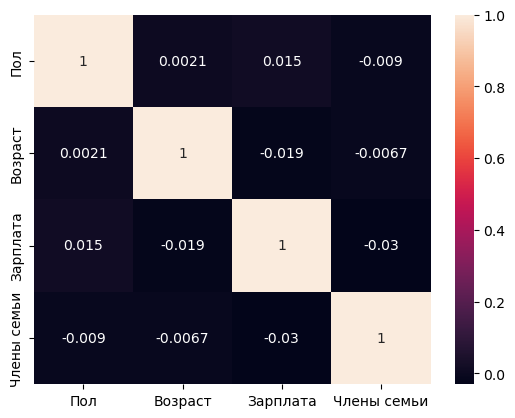

In [12]:
data_fch = data_raw.drop('Страховые выплаты', axis=1)
fch_columns = data_fch.columns
sns.heatmap(data_fch.loc[:, fch_columns].corr(), annot=True);

Как видим - все признаки скоррелированы очень слабо.

### Вывод

Данные загружены, пропусков и аномалий в данных нет. Оптимизация типов позволила уменьшить размер датасета с 195.4 KB до 58.7 KB .

## Умножение матриц

### Вычисление вектора весов по формуле и с применением класса `LinearRegression()`

Значания весов вычисляются по формуле
$$
w = (X^T X)^{-1} X^T y
$$

Проверим на основе реальных данных, что значения весов совпадают, если их вычислить по формуле и если вычислить с применением класса `LinearRegression` из библиотки **scikit-learn**

In [13]:
features = data_raw.drop('Страховые выплаты',axis=1)
target = data_raw['Страховые выплаты']

X = np.concatenate( (np.ones((features.shape[0], 1)), features), axis=1 )
y = target

w_calc = np.linalg.inv(X.T @ X) @ X.T @ y

model = LinearRegression()
model.fit(features, target)
w_model = np.hstack((model.intercept_, model.coef_))

In [14]:
pd.DataFrame(data={'Формула $(X^T X)^{-1} X^T y$': w_calc.tolist(),
                   'Класс LinearRegression': w_model.tolist()},
             index=['w'+ str(i) for i in range(len(w_calc.tolist()))] ).T

,w0,w1,w2,w3,w4
Формула $(X^T X)^{-1} X^T y$,-0.938236,0.007926,0.035708,-1.700805e-07,-0.013568
Класс LinearRegression,-0.938236,0.007926,0.035708,-1.700805e-07,-0.013568


Коэффициенты - одинаковые

### Теоретическое подтверждение неизменности предсказаний при умножении признаков на обратимую матрицу

Теперь ответим на основной вопрос 2-го раздела ...

**Вопрос:** Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

Введем обозначения:

- $X$ — матрица признаков (левый столбец состоит из единиц)

- $y$ — вектор целевого признака

- $M$ — матрица, на которую умножаются признаки ($ X' = XM$)

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:
$$
a = Xw
$$
$$
a' = X'w
$$

Задача обучения:
$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:
$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** не изменится

**Обоснование:** 

По условию матрица $M$ обратимая - т.е. имет обратную матрицу. Значит эта матрица квадратная. Примем размерность матрицы признаков $X$ равной `{n, m}`, где `n` - число наблюдений, а `m` - число признаков (фитчей). При этом обычно `n >> m`. Размерность матрицы $M$ должна быть `{m, m}`, в итоге размерность матрицы $X'$ будет `{n, m}`

Запишем формулу обучения (нахождения вектора весов), но уже учитывая $X' = XM$:

$$
a' = X' ((X')^T (X'))^{-1} (X')^T y = XM ((XM)^T (XM))^{-1} (XM)^T y
$$ 

учитывая:
$$(AB)^{-1} = B^{-1} A^{-1}$$
и
$$
(AB)^T = B^T A^T
$$

преобразуем:
$$
a' = XM (M^{T}X^{T}XM)^{-1} M^T X^T y = XM M^{-1} (X^TX)^{-1} (M^T)^{-1} M^T X^T y = X E (X^TX)^{-1} E X^T y = X (X^T X)^{-1}X^Ty
$$

но по условию у нас:
$$
w = (X^T X)^{-1} X^T y
$$
значит:
$$
a' = Xw
$$
из этого следует, что:
$$
a = a' = Xw
$$

### Вывод

Значение вектора предсказаний $a$ не изменится, если матрицу признаков $X$ умножить справа на обратимую матрицу $M$

## Алгоритм преобразования

**Алгоритм**

Для защиты персональных данных будем умножать матрицу признаков $X$ на обратимую матрицу $M$, которая будет генерироваться случайным образом, с применением функции `numpy.random.randint()`.

Алгоритм будет состоять из следующих шагов:

1. Генерация матрицы $M$ размерности `{m, m}`, где `m` число фитчей (столбцов) в матрице $X$;
2. Проверка матрицы $M$ на обратимость (проверка $det M \ne 0$);
3. Получение матрицы $X'= XM$ преобразованных признаков;

**Обоснование**

Алгоритм удовлетворяет всем требованиям, проверенным теоретически выше. 
- матрица $M$ обратимая (проверка на обратимость заложена в алгоритме)
- матрица $M$ квадратная и размерность матрицы $M$ соотвествует числу признаков (фитчей)
- умножение на матрицу $M$ производится "справа"

## Проверка алгоритма

Проверку алгоритма будем проводить, обучая модель `LinearRegression()` на оригинальных и преобразованных данных, а затем сравним метрики

### Модель с исходными признаками

Разделение данных на обучающую и тестовую выборки

In [15]:
fch_train, fch_test, trgt_train, trgt_test = train_test_split(
    features, target, test_size=0.25, random_state=RND_ST
)

In [16]:
model = LinearRegression()

In [17]:
model.fit(fch_train, trgt_train)
predictions_raw = model.predict(fch_test)
r2_raw = r2_score(trgt_test, predictions_raw)
MAE_raw = mean_absolute_error(trgt_test, predictions_raw)
w_model_raw = np.hstack((model.intercept_, model.coef_))
print('r2:', r2_raw)
print('MAE:', MAE_raw)
print('Коэффициенты:', '\n', w_model_raw.tolist())

r2: 0.42547785406963134
MAE: 0.2532577223096975
Коэффициенты: 
 [-0.9200267704143777, 0.004924320857818895, 0.03515271957090624, -2.4579661907220274e-07, -0.014914008857130633]


### Модель с модифицированными признаками

Создадим функцию для генерации случайной матрицы $M$ и преобразования матрицы $X$ в $X'=XM$ 

In [18]:
def modify_matrix(features):
    m = features.shape[1]
    np.random.seed(RND_ST)
    M = np.random.randint(1, 25, (m,m))
    det = np.linalg.det(M)
    while det == 0:
        M = np.random.randint(1, 25, (m,m))
        det = np.linalg.det(M)
    
    modified_features = features @ M
    return modified_features, M

Применим функцию к признакам, выведем данные до, после преобразования и саму матрицу $M$:

In [19]:
display(features.sample(7, random_state=RND_ST))
features_mod, M_matrix = modify_matrix(features)
display(features_mod.sample(7, random_state=RND_ST))
display(M_matrix)

,Пол,Возраст,Зарплата,Члены семьи
1501,1,28,56100.0,0
2586,1,32,41900.0,2
2653,1,30,26300.0,0
1055,1,30,37300.0,2
705,0,44,30000.0,1
106,1,45,41600.0,2
589,1,28,32800.0,2


,0,1,2,3
1501,1290531.0,617708.0,617311.0,1346943.0
2586,964005.0,461600.0,461155.0,1006267.0
2653,605147.0,289950.0,289525.0,631781.0
1055,858189.0,410958.0,410541.0,895829.0
705,690373.0,330928.0,330316.0,720860.0
106,957209.0,458573.0,457946.0,999314.0
589,754673.0,361416.0,361027.0,787791.0


array([[ 7, 20, 15, 11],
       [ 8, 21,  7, 19],
       [23, 11, 11, 24],
       [21,  4,  8, 24]])

Разделение данных с преобразованными признаками на обучающую и тестовую выборки:

In [20]:
fch_mod_train, fch_mod_test, trgt_train, trgt_test = train_test_split(features_mod, target, test_size=0.25, random_state=RND_ST)

In [21]:
model.fit(fch_mod_train, trgt_train)
predictions_mod = model.predict(fch_mod_test)
r2_mod = r2_score(trgt_test, predictions_mod)
MAE_mod = mean_absolute_error(trgt_test, predictions_mod)
w_model_mod = np.hstack((model.intercept_, model.coef_))
print('r2 для модифицированных признаков:',r2_mod)
print('MAE для модифицированных признаков:', MAE_mod)
print('Коэффициенты для модифицированных признаков:', '\n', w_model_mod.tolist())

r2 для модифицированных признаков: 0.4254778540696863
MAE для модифицированных признаков: 0.2532577223096853
Коэффициенты для модифицированных признаков: 
 [-0.9200267704153721, 0.0015133067837364534, 0.0035244568556094466, -0.004261349498735802, -0.0011125201145069817]


## Общий вывод

Выведем сводную таблицу параметров и метрик моделей для исходных и модифицированных признаков:

In [22]:
(
    pd.DataFrame(data={'Исходные признаки': (r2_raw, MAE_raw),
                   'Модифицированные признаки': (r2_mod, MAE_mod)},
             index=['R2', 'MAE'] ).T
    .join(pd.DataFrame(data={'Исходные признаки': w_model_raw.tolist(),
                   'Модифицированные признаки': w_model_mod.tolist()},
             index=['w'+ str(i) for i in range(len(w_model_raw.tolist()))] ).T)
)

,R2,MAE,w0,w1,w2,w3,w4
Исходные признаки,0.425478,0.253258,-0.920027,0.004924,0.035153,-2.457966e-07,-0.014914
Модифицированные признаки,0.425478,0.253258,-0.920027,0.001513,0.003524,-4.261349e-03,-0.001113


Качество линейной регресии (метрики `R2` и `MAE`) не изменилось при обучении и прогнозе на исходных признаках и при обучении и прогнозе на модифицированных признаках.

Однако, заметим, что коэффициенты модели поменялись, кроме $w_0$.

Как видим, персональную информацию довольно просто "скрыть", при этом не теряя информационное наполнение данных.